In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
# Get a list of all files which are .csv files in ../DOTSSimulator/Assets/SimulationResults
import os
files = [f for f in os.listdir('../DOTSSimulator/Assets/SimulationResults') if f.endswith('.csv')]
# Sort the files descending
files.sort(reverse=True)

print(f'Found {len(files)} files')
print(f'Newest file: {files[0]}')

result_file_path = f'../DOTSSimulator/Assets/SimulationResults/{files[0]}'

Found 36 files
Newest file: 2023-05-16-17-23-43.csv


In [3]:
results_df = pd.read_csv(result_file_path)
# Print basic information about the dataframe
print(results_df.info())

results_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Step                1 non-null      int64  
 1   TimeStamp           1 non-null      float64
 2   AvgEnergy           1 non-null      int64  
 3   NoBoids             1 non-null      int64  
 4   NoFoodSources       1 non-null      int64  
 5   TotalFoodAvailable  1 non-null      float64
 6   Polarization        1 non-null      float64
 7   Expanse             1 non-null      float64
dtypes: float64(4), int64(4)
memory usage: 192.0 bytes
None


,Step,TimeStamp,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
0,0,0.000999,100,300,4,200.8,0.499837,4.813939


In [4]:
# Configuration:

# number of rows to ignore
ignore_rows = 0

truncated_df = results_df.tail(-ignore_rows)

In [5]:
def combine_axis_in_legend(axs, ax_to_legend):
    hanbdles =[]
    labels = []
    for ax_1 in axs:
        handle, label = ax_1.get_legend_handles_labels()
        hanbdles.extend(handle)
        labels.extend(label)
    ax_to_legend.legend(hanbdles, labels, loc=0)

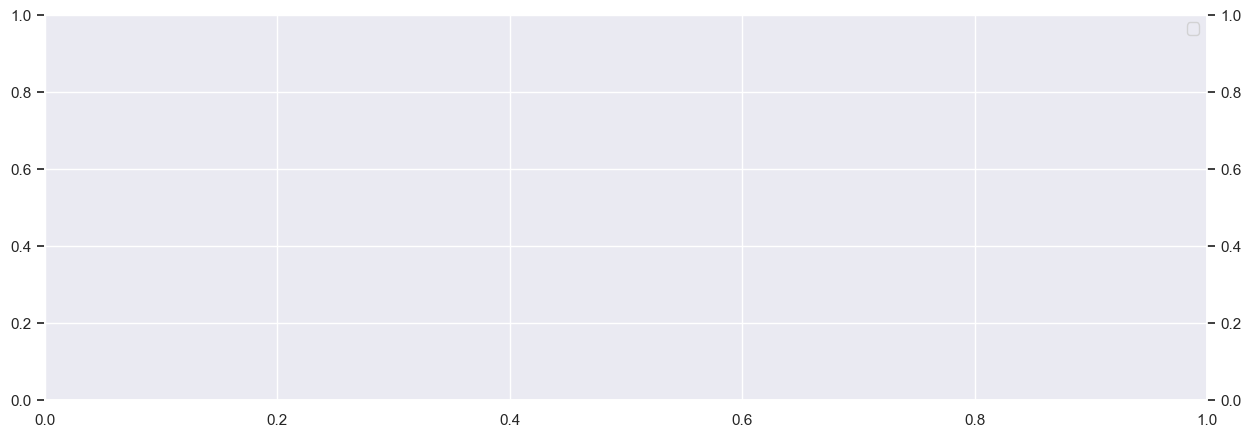

In [6]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot()
sns.lineplot(data=truncated_df, x='Step', y='AvgEnergy', label='AvgEnergy', color='blue', ax=ax)
ax2 = plt.twinx()
ax2.grid(False)
sns.lineplot(data=truncated_df, x='Step', y='TotalFoodAvailable', label='TotalFoodAvailable', ax=ax2, color='red')
combine_axis_in_legend([ax, ax2], ax2)

<AxesSubplot: xlabel='Step', ylabel='NoBoids'>

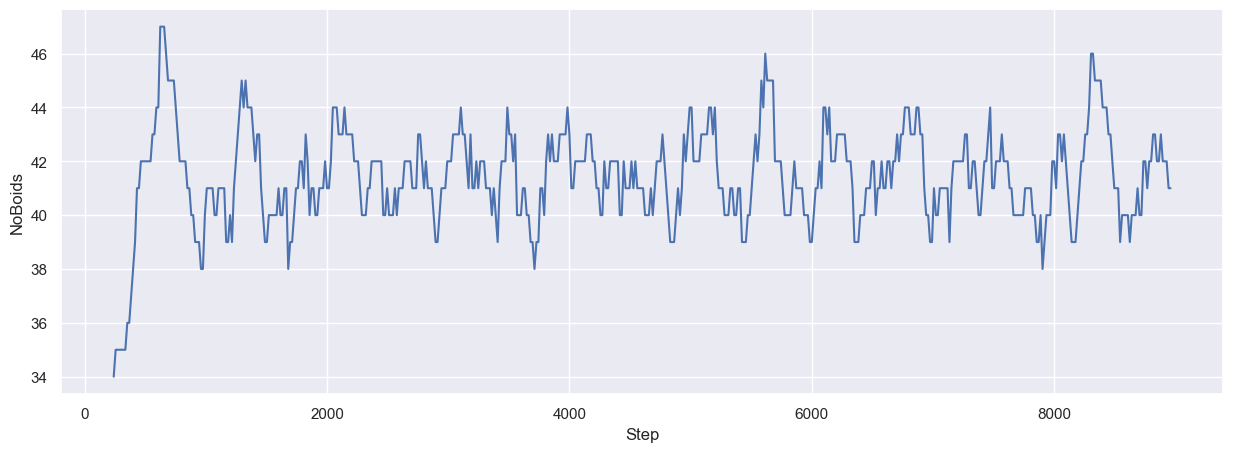

In [59]:
fig = plt.figure(figsize=(15, 5))
sns.lineplot(data=truncated_df, x='Step', y='NoBoids')

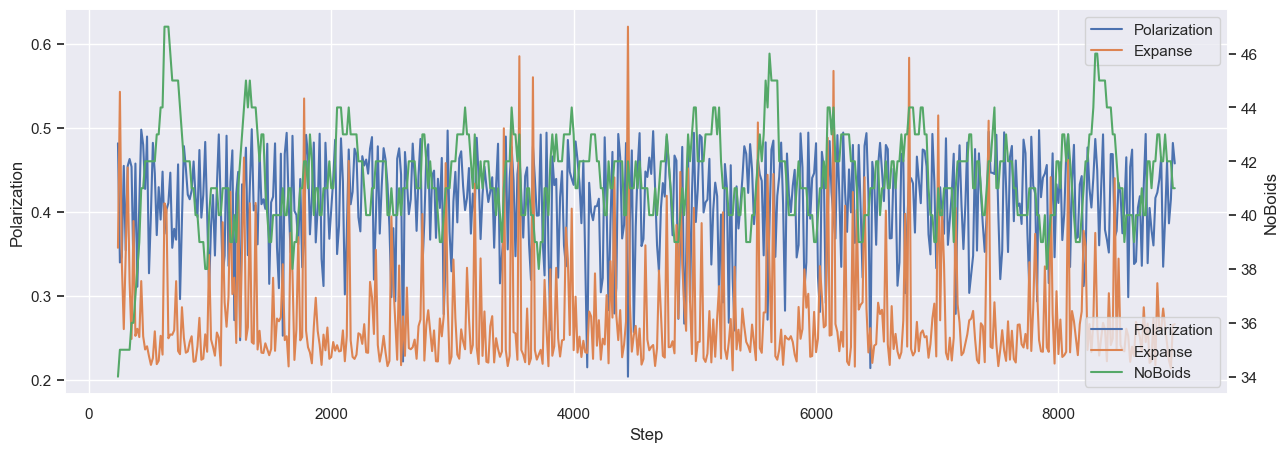

In [60]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()
sns.lineplot(data=truncated_df, x='Step', y='Polarization', label='Polarization', ax=ax)
sns.lineplot(data=truncated_df, x='Step', y='Expanse', label='Expanse', ax=ax)

ax2 = plt.twinx()
ax2.grid(False)
sns.lineplot(data=truncated_df, x='Step', y='NoBoids', color="g", label='NoBoids', ax=ax2)

combine_axis_in_legend([ax, ax2], ax2)


In [ ]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot()
sns.lineplot(data=truncated_df, x='Step', y='AvgEnergy', label='AvgEnergy', color='blue', ax=ax)
plt.xlabel('Hours')
plt.ylabel('AvgEnergy')
plt.show()